# 📊 Projeto: Monitoramento de Qualidade Industrial (KPIs)

## 🎯 Objetivo
Desenvolver um sistema de monitoramento para a **Linha de Cortes** de um frigorífico, visando controlar a **Taxa de Quebra** (Desperdício).
A meta da empresa é manter a perda abaixo de **3%** do volume produzido.

## 🛠️ Tecnologias Utilizadas
* **Python:** Linguagem base para análise.
* **Pandas:** Manipulação e estruturação dos dados diários.
* **Matplotlib:** Criação de visualizações gerenciais (Linha temporal e Pizza).
* **Numpy:** Simulação de dados com sementes fixas para reprodutibilidade.

## 📈 Metodologia e Cenário
Os dados simulam o período de **Jan/25 a Fev/25**.
* Foi inserido um "Viés de Falha" intencional na 3ª semana de Janeiro para testar a capacidade de detecção do algoritmo.
* O KPI calculado segue a fórmula: $\text{Taxa de Quebra} = (\frac{\text{Peso Descartado}}{\text{Peso Produzido}}) \times 100$

In [2]:
# Bibliotecas importadas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import matplotlib.dates as mdates

### Configuração dos Dados

In [4]:
# 1. Intervalo de datas (Janeiro e Fevereiro)
np.random.seed(42)
dias = pd.date_range(start='2025-01-01', end='2025-02-28', freq='D')
n_dias = len(dias)

peso_produzido = np.random.randint(4800, 5200, size=n_dias) # Produção
peso_descartado = np.random.randint(80, 165, size=n_dias) # Descarte
# Inserindo um Fator Caos
peso_descartado[20:28] = np.random.randint(160, 230, size=8)

### Criando o DataFrame

In [6]:
df_producao = pd.DataFrame(
    { 'Data': dias,
      'Producao_kg': peso_produzido,
      'Descarte_kg': peso_descartado }
)
# Criando o KPI: (Descarte / Produção Total) * 100
df_producao['KPI_Quebra_Pct'] = (df_producao['Descarte_kg'] / df_producao['Producao_kg']) * 100
df_producao['KPI_Quebra_Pct'] = df_producao['KPI_Quebra_Pct'].round(2)

# Análise: Verificar se batemos a meta
META_MAXIMA = 3.0 # 3%
df_producao['Meta_Batida'] = df_producao['KPI_Quebra_Pct'] <= META_MAXIMA

In [7]:
print(df_producao.shape)
df_producao.head()

(59, 5)


,Data,Producao_kg,Descarte_kg,KPI_Quebra_Pct,Meta_Batida
0,2025-01-01,4902,163,3.33,False
1,2025-01-02,5148,139,2.70,True
2,2025-01-03,5070,150,2.96,True
3,2025-01-04,4906,123,2.51,True
4,2025-01-05,4871,87,1.79,True


In [8]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_producao[['Producao_kg', 'Descarte_kg', 'KPI_Quebra_Pct']].describe())

,Producao_kg,Descarte_kg,KPI_Quebra_Pct
count,59.00,59.00,59.00
mean,5006.24,130.93,2.62
std,114.39,36.19,0.72
min,4813.00,80.00,1.57
25%,4904.00,104.00,2.07
50%,4991.00,126.00,2.53
75%,5110.50,154.50,3.16
max,5187.00,221.00,4.46


In [9]:
print(df_producao['Producao_kg'].sum())
print(df_producao['Descarte_kg'].sum())

295368
7725


### Gráfico Temporal

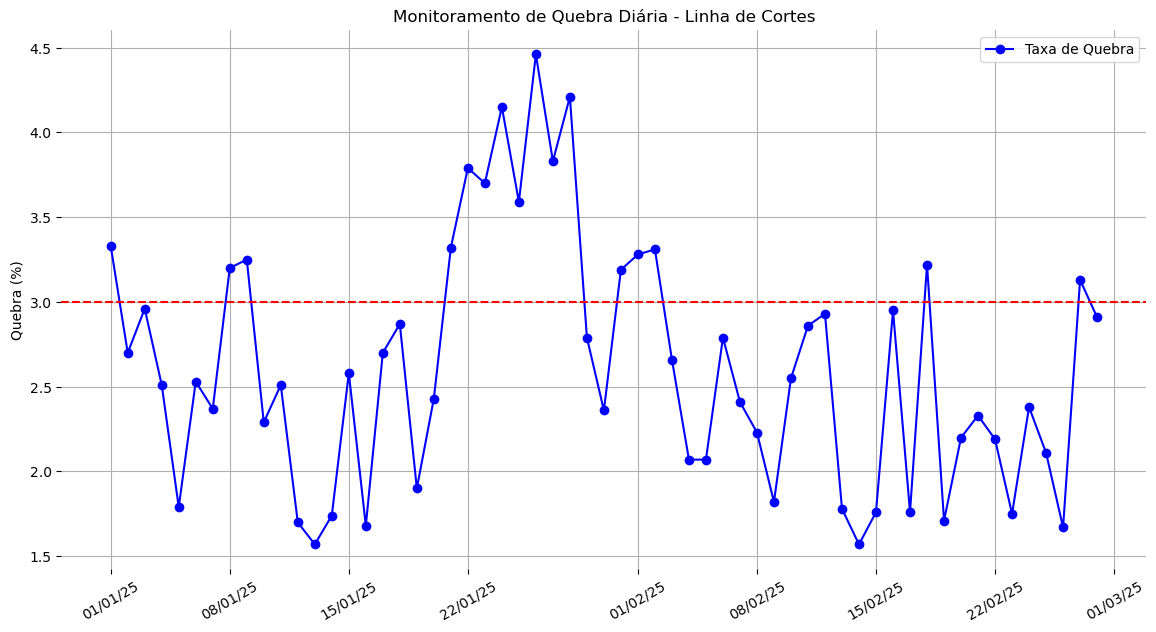

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df_producao['Data'], df_producao['KPI_Quebra_Pct'], marker='o', linestyle='-', color='blue', label='Taxa de Quebra')
plt.title('Monitoramento de Quebra Diária - Linha de Cortes')
plt.xlabel('')
plt.ylabel('Quebra (%)')
plt.xticks(rotation=30)
plt.legend()
plt.grid(True)
plt.box(False)
plt.axhline(y=META_MAXIMA, color='red', linestyle='--', label='Meta Máxima (3%)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))

plt.show()

In [12]:
# Filtrar apenas os dias ruins (acima da meta)
dias_ruins = df_producao[df_producao['KPI_Quebra_Pct'] > META_MAXIMA]

# Contar quantos foram
qtd_dias_ruins = len(dias_ruins)
total_dias = len(df_producao)
porcentagem_falha = (qtd_dias_ruins / total_dias) * 100

# Somar o prejuízo (Peso Descartado) apenas dos dias ruins
prejuizo_total_kg = dias_ruins['Descarte_kg'].sum()
texto_1 = (f"""
## RELATÓRIO DE QUALIDADE \n
----
### Período Analisado: {total_dias} dias.\n
### Produçao total em Janeiro e Fevereiro: {df_producao['Producao_kg'].sum()}\n
### Desperdicio total em Janeiro e Fevereiro: {df_producao['Descarte_kg'].sum()} \n
### Dias fora da meta: {qtd_dias_ruins} dias {porcentagem_falha:.1f}%\n
### Total de produto descartado nos dias críticos: {prejuizo_total_kg:,.0f} kg\n
""")
display(Markdown(texto_1))


## RELATÓRIO DE QUALIDADE 

----
### Período Analisado: 59 dias.

### Produçao total em Janeiro e Fevereiro: 295368

### Desperdicio total em Janeiro e Fevereiro: 7725 

### Dias fora da meta: 16 dias 27.1%

### Total de produto descartado nos dias críticos: 2,841 kg



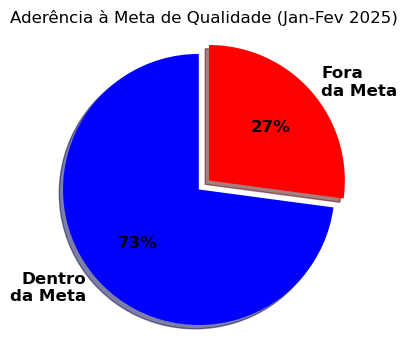

In [13]:
# Agregando os dados
dias_ok = len(df_producao[df_producao['Meta_Batida'] == True])
dias_ruins = len(df_producao[df_producao['Meta_Batida'] == False])

# Criando as listas para o gráfico
tamanhos = [dias_ok, dias_ruins]
labels = ['Dentro\nda Meta', 'Fora\nda Meta']
cores = ['#0000FF', '#ff0000']
destaque = (0, 0.1) 

plt.figure(figsize=(4, 4))
plt.pie(
    tamanhos, explode=destaque, labels=labels, colors=cores, autopct='%1.0f%%', 
    shadow=True, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'}
       )
plt.title('Aderência à Meta de Qualidade (Jan-Fev 2025)')
plt.axis('equal')
plt.show()

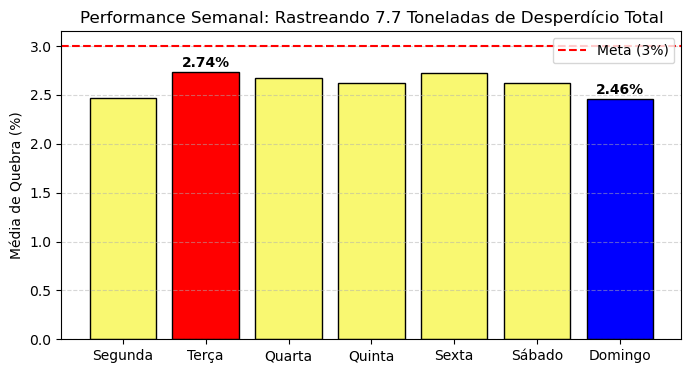

In [14]:
# Preparação dos dados
total_desperdicio_ton = df_producao['Descarte_kg'].sum() / 1000

traducao = {
    'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta',
    'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'
}
df_producao['Dia_Semana'] = df_producao['Data'].dt.day_name().map(traducao)

ordem_dias = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
df_semanal = df_producao.groupby('Dia_Semana')['KPI_Quebra_Pct'].mean().reindex(ordem_dias)

# 3. Lógica das Cores
dia_pior = df_semanal.idxmax()
dia_melhor = df_semanal.idxmin()

cores_condicionais = []
for dia in df_semanal.index:
    if dia == dia_pior:
        cores_condicionais.append('#ff0000') # Vermelho (Pior)
    elif dia == dia_melhor:
        cores_condicionais.append('#0000FF') # Azul (Melhor)
    else:
        cores_condicionais.append('#f9f871') # Amarelo Claro (Neutro - para dar destaque aos outros)

# Visualizando
plt.figure(figsize=(8, 4))
barras = plt.bar(df_semanal.index, df_semanal.values, color=cores_condicionais, edgecolor='black')
plt.title(f'Performance Semanal: Rastreando {total_desperdicio_ton:.1f} Toneladas de Desperdício Total')
plt.ylabel('Média de Quebra (%)')
plt.axhline(y=META_MAXIMA, color='red', linestyle='--', label='Meta (3%)')

# Adicionando rótulos nos destaques
for i, barra in enumerate(barras):
    dia_atual = df_semanal.index[i]
    if dia_atual == dia_pior or dia_atual == dia_melhor:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2., altura + 0.05,
                 f'{altura:.2f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# 🚀 Conclusão e Insights Executivos

Com base na análise dos dados de **Jan/25 e Fev/25**, identificamos:

1.  **Diagnóstico Geral:**
    * A operação apresentou uma **aderência de 73%** à meta estabelecida.
    * Entretanto, **27% dos dias** (16 dias) operaram com desperdício acima do aceitável, gerando um prejuízo acumulado de **2.8 toneladas**.

2.  **Ponto Crítico (Anomalia Detectada):**
    * Detectamos uma falha sistêmica severa na **última semana de Janeiro**, onde a quebra superou consistentemente 4%, indicando uma possível falha de maquinário ou lote de matéria-prima defeituoso naquele período específico.

3.  **Próximos Passos (Plano de Ação):**
    * Investigar os relatórios de manutenção da 3ª semana de Janeiro.
    * Implementar alertas automáticos em tempo real (via Streamlit ou Power BI) para quando a quebra diária ultrapassar 3.0%, evitando que o problema persista por dias consecutivos.

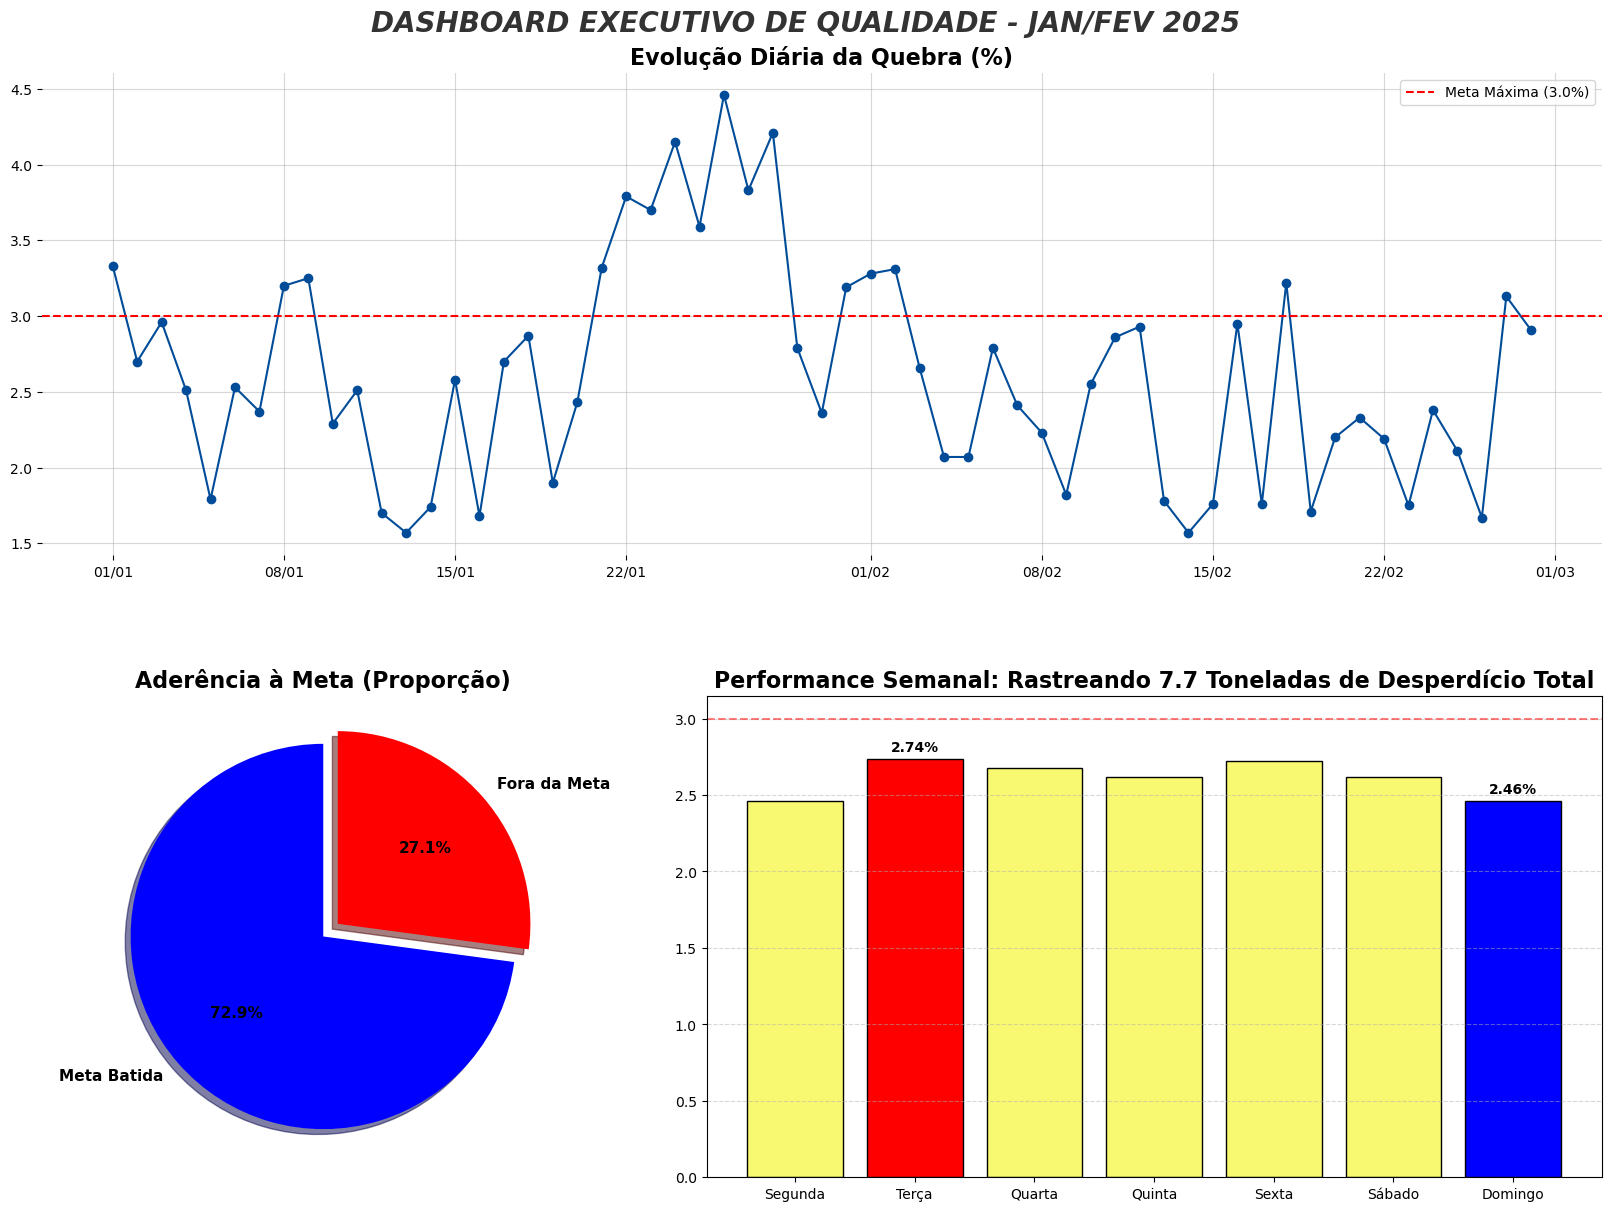

In [16]:
# Configurando o Layout Visual (O Mosaico)
# A = Gráfico de Linha (Topo)
# B = Gráfico de Pizza (Canto Inferior Esquerdo)
# C = Gráfico de Barras (Canto Inferior Direito)
layout_mosaico = [
    ['A', 'A', 'A', 'A', 'A'],
    ['B', 'B', 'C', 'C', 'C']
]
espacamento = {'hspace': 0.15, 'wspace': 0.1}
# Criamos a figura e o dicionário de eixos (axd)
fig, axd = plt.subplot_mosaic(layout_mosaico, figsize=(16, 12), constrained_layout=True, gridspec_kw=espacamento)

# Título Geral do Painel
fig.suptitle('DASHBOARD EXECUTIVO DE QUALIDADE - JAN/FEV 2025', fontsize=20, fontweight='bold',style='italic', color='#333333')

# ------------------------------------------------------------------------------------------
# --- GRÁFICO A: EVOLUÇÃO TEMPORAL (LINHA) ---
axd['A'].plot(df_producao['Data'], df_producao['KPI_Quebra_Pct'], marker='o', linestyle='-', color='#004c99')
axd['A'].set_title('Evolução Diária da Quebra (%)', fontsize=16, fontweight='bold')
axd['A'].axhline(y=META_MAXIMA, color='red', linestyle='--', label=f'Meta Máxima ({META_MAXIMA}%)')
axd['A'].legend(loc='upper right')
axd['A'].set_frame_on(False)
axd['A'].grid(True, alpha=0.5)
# Formatando Datas no Eixo A
axd['A'].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

# ------------------------------------------------------------------------------------------
# --- GRÁFICO B: PIZZA (PROPORÇÃO) ---
dias_ok = len(df_producao[df_producao['Meta_Batida'] == True])
dias_ruins = len(df_producao[df_producao['Meta_Batida'] == False])
axd['B'].pie([dias_ok, dias_ruins], 
             explode=(0, 0.1), 
             labels=['Meta Batida', 'Fora da Meta'], 
             colors=['#0000FF', '#ff0000'],
             autopct='%1.1f%%', 
             shadow=True, startangle=90,
             textprops={'fontsize': 11, 'fontweight': 'bold'})
axd['B'].set_title('Aderência à Meta (Proporção)', fontsize=16, fontweight='bold')

# ------------------------------------------------------------------------------------------
# --- GRÁFICO C: BARRAS SEMANAIS (PERFORMANCE) ---
df_semanal = df_producao.groupby('Dia_Semana')['KPI_Quebra_Pct'].mean().reindex(ordem_dias)
total_ton = df_producao['Descarte_kg'].sum() / 1000

cores_cond = []
dia_pior = df_semanal.idxmax()
dia_melhor = df_semanal.idxmin()
for dia in df_semanal.index:
    if dia == dia_pior: cores_cond.append('#ff0000')
    elif dia == dia_melhor: cores_cond.append('#0000FF')
    else: cores_cond.append('#f9f871')

barras = axd['C'].bar(df_semanal.index, df_semanal.values, color=cores_cond, edgecolor='black')
axd['C'].set_title(f'Performance Semanal: Rastreando {total_ton:.1f} Toneladas de Desperdício Total', fontsize=16, fontweight='bold')
axd['C'].axhline(y=META_MAXIMA, color='red', linestyle='--', alpha=0.5)
axd['C'].grid(axis='y', linestyle='--', alpha=0.5)

# Rótulos nas barras
for i, barra in enumerate(barras):
    dia = df_semanal.index[i]
    if dia == dia_pior or dia == dia_melhor:
        axd['C'].text(barra.get_x() + barra.get_width()/2., barra.get_height() + 0.05,
                      f'{barra.get_height():.2f}%', ha='center', fontweight='bold')
plt.savefig('Dashboard_Qualidade_Industrial.png', bbox_inches='tight', dpi=150)
plt.show()